In [2]:
#Checking current working directory
import os
print(os.getcwd())

D:\Clients\Imarticus\Data Science\NewDSP\Python_DSP11


In [3]:
#Setting working directory
path = 'D:\\Clients\\Imarticus\\Data Science\\DSP17'
os.chdir(path)
print(os.getcwd())

D:\Clients\Imarticus\Data Science\DSP17


In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns

C:\Users\bsinghal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [33]:
data = pd.read_csv('banking.csv')
data = data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [34]:
# The classification goal is to predict whether 
# the client will subscribe (1/0) to a term deposit (variable y).
# Input Variables
  # 1. age (numeric)
  # 2. job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
  # 3. marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
  # 4. education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
  # 5. default: has credit in default? (categorical: “no”, “yes”, “unknown”)
  # 6. housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
  # 7. loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
  # 8. contact: contact communication type (categorical: “cellular”, “telephone”)
  # 9. month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
  # 10. day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
  # 11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
  # 12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  # 13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  # 14. previous: number of contacts performed before this campaign and for this client (numeric)
  # 15. poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
  # 16. emp.var.rate: employment variation rate — (numeric)
  # 17. cons.price.idx: consumer price index — (numeric)
  # 18. cons.conf.idx: consumer confidence index — (numeric)
  # 19. euribor3m: euribor 3 month rate — (numeric)
  # 20. nr.employed: number of employees — (numeric)

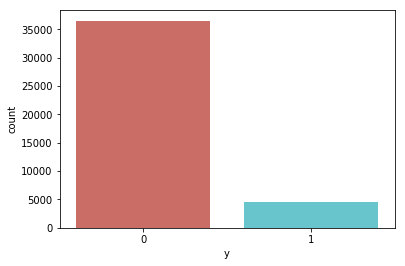

In [35]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()

In [36]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

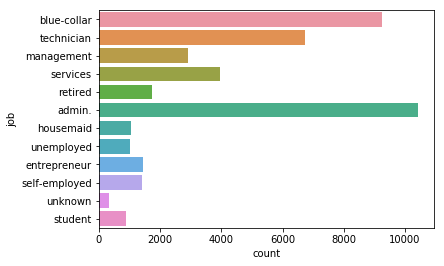

In [37]:
sns.countplot(y="job", data=data)
plt.show()

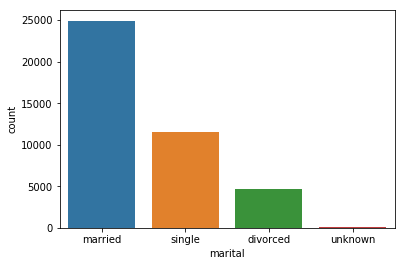

In [38]:
sns.countplot(x="marital", data=data)
plt.show()

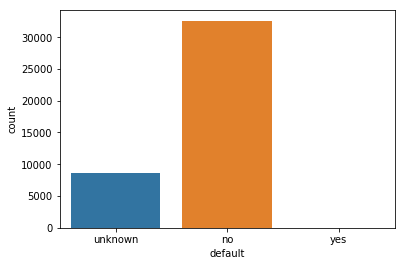

In [39]:
sns.countplot(x="default", data=data)
plt.show()

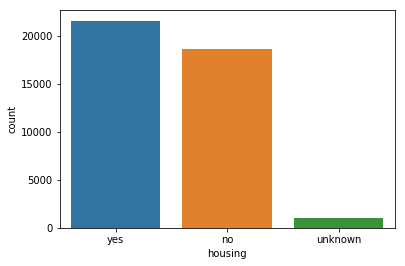

In [40]:
sns.countplot(x="housing", data=data)
plt.show()

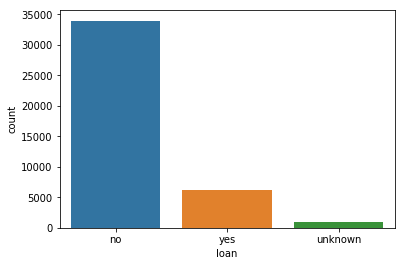

In [41]:
sns.countplot(x="loan", data=data)
plt.show()

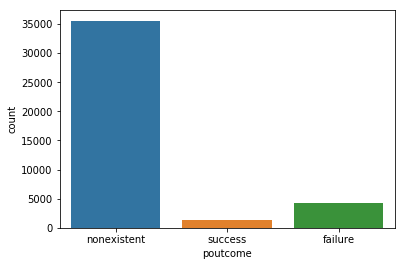

In [42]:
sns.countplot(x="poutcome", data=data)
plt.show()

In [43]:
# Our prediction will be based on the customer’s job, marital status, 
# whether he(she) has credit in default, whether he(she) has a housing loan, 
# whether he(she) has a personal loan, 
# and the outcome of the previous marketing campaigns. 
# So, we will drop the variables that we do not need.

In [44]:
data.drop(data.columns[[0, 3, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]], axis=1, inplace=True)

In [45]:
data.head()

,job,marital,default,housing,loan,poutcome,y
0,blue-collar,married,unknown,yes,no,nonexistent,0
1,technician,married,no,no,no,nonexistent,0
2,management,single,no,yes,no,success,1
3,services,married,no,no,no,nonexistent,0
4,retired,married,no,yes,no,success,1


In [46]:
# In logistic regression models, encoding all of the independent variables 
# as dummy variables allows easy interpretation and calculation of the odds ratios, 
# and increases the stability and significance of the coefficients.

In [47]:
data2 = pd.get_dummies(data, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])

In [48]:
data2.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [49]:
data2.head()

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [50]:
data.poutcome.unique()

array(['nonexistent', 'success', 'failure'], dtype=object)

In [51]:
data2.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [56]:
data2.loc[:, data2.columns.str.startswith('poutcome')][0:3]

,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,1,0
1,0,1,0
2,0,0,1


In [57]:
# Drop the unknown columns
data2.drop(data2.columns[[12, 16, 18, 21, 24]], axis=1, inplace=True)
data2.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [58]:
data2.loc[:, data2.columns.str.endswith('unknown')][0:3]

""
0
1
2


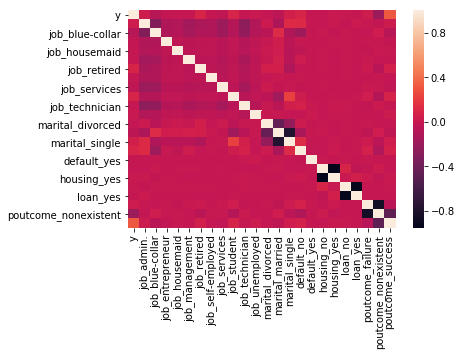

In [59]:
# Check the independence between the independent variables
sns.heatmap(data2.corr())
plt.show()

In [85]:
# Split the data- Train Set and test Set
X = data2.iloc[:,1:]
y = data2.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [86]:
# Check out training data is sufficient
X_train.shape

(30891, 23)

In [87]:
# Fit logistic regression to the training set
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [88]:
# Predicting the test set results and creating confusion matrix
# The confusion_matrix() function will calculate a confusion matrix 
# and return the result as an array.
y_pred = classifier.predict(X_test)
y_pred_prob = classifier.predict_proba(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
# TP  FP
# FN  TN

[[9046  110]
 [ 912  229]]


In [64]:
# The result is telling us that we have 9046+229 correct predictions 
# and 912+110 incorrect predictions.

In [67]:
# Print the accuracy:
print(classifier.score(X_test, y_test))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

0.9007477906186268
Accuracy of logistic regression classifier on test set: 0.90


In [68]:
#To quote from Scikit Learn:

#The precision is the ratio tp / (tp + fp) 
# where tp is the number of true positives and fp the number of false positives. 
# The precision is intuitively the ability of the classifier 
# to not label a sample as positive if it is negative.

#The recall is the ratio tp / (tp + fn) 
# where tp is the number of true positives and fn the number of false negatives. 
# The recall is intuitively the ability of the classifier to find all the positive samples.

#The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, 
# where an F-beta score reaches its best value at 1 and worst score at 0.
#The F-beta score weights the recall more than the precision by a factor of beta. 
# beta = 1.0 means recall and precision are equally important.

#The support is the number of occurrences of each class in y_test.

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95      9156
          1       0.68      0.20      0.31      1141

avg / total       0.88      0.90      0.88     10297



In [70]:
# Of the entire test set, 88% of the promoted term deposit 
# were the term deposit that the customers liked. Of the entire test set, 
# 90% of the customer’s preferred term deposits that were promoted.

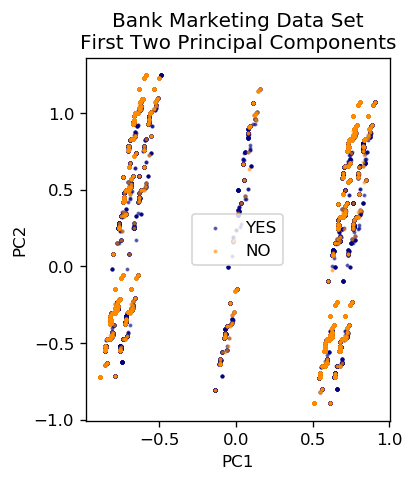

In [71]:
# Visualizing the Classification by converting inputs to 2D using PCA
from sklearn.decomposition import PCA
X = data2.iloc[:,1:]
y = data2.iloc[:,0]
pca = PCA(n_components=2).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)

plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='YES', s=2, color='navy')
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='NO', s=2, color='darkorange')
plt.legend()
plt.title('Bank Marketing Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.show()

In [79]:
print(y_pred.shape)

(10297,)


In [81]:
y_pred[1:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [90]:
y_pred_prob[1:15]

array([[0.87206729, 0.12793271],
       [0.91687402, 0.08312598],
       [0.89447559, 0.10552441],
       [0.91458038, 0.08541962],
       [0.88045625, 0.11954375],
       [0.89447559, 0.10552441],
       [0.93577859, 0.06422141],
       [0.87859295, 0.12140705],
       [0.96445059, 0.03554941],
       [0.92924321, 0.07075679],
       [0.96515158, 0.03484842],
       [0.38493903, 0.61506097],
       [0.89956604, 0.10043396],
       [0.79363194, 0.20636806]])